* By: Illya Barziy
* Email: illyabarziy@gmail.com
* Reference: Advances in Financial Machine Learning, Chapter-15

## Chapter 15 Understanding Strategy Risk

## Introduction

As the majority of the investment strategies have exit conditions (either in a form of stop loss or take profit), the outcomes can be modeled using a binomial process. This approach shows whether the strategy is sensitive to minor changes in betting frequency, odds and payouts. 

In this notebook the exercises from Chapter-15 in the book "Advances in Financial Machine Learning" are implemented. 

In [132]:
#import numbers
import numpy as np
import scipy.stats as ss
from random import gauss
from itertools import product
#import pandas as pd
#import random
#from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.spatial.distance import pdist, squareform
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns

## Question-15.1

### A portfolio manager intends to launch a strategy that targets an annualized SR of 2. Bets have a precision rate of 60%, with weekly frequency. The exit conditions are 2% for profit-taking, and –2% for stop-loss.

### (a) Is this strategy viable?

In [12]:
'''
We assume the exit conditions to be for log returns, therefore we can assume payouts being symmetric.

Using the Snippet 15.1:
'''
trades_per_year = 52
out,p=[],.6

for i in range(1000000):
    rnd=np.random.binomial(n=1,p=p)
    x=(1 if rnd==1 else -1)
    out.append(x)
print('Sharpe Ratio is' , (np.mean(out)/np.std(out))*(trades_per_year)**(1/2))

Sharpe Ratio is 1.4681121850602123


Wigh given parameters, the Sharpe Ratio of the strategy falls below the desired threshold of 2, therefore the strategy is __not__ viable.

### (b) _Ceteris paribus_, what is the required precision rate that would make the strategy profitable?

In [13]:
'''
Using the formula solution:
'''
n, SR = 52, 2

precision = 1/2 * (1 + (1-n/(SR**2+n))**(1/2))

print('Required precision is' , precision)

Required precision is 0.6336306209562121


So, an increase of precision from 0.6 set by manager to 0.63363 will make the strategy profitable at a required Sharpe Ratio of 2.

### (c) For what betting frequency is the target achievable?

Using the formula solutions:

$\frac{n}{\theta^2+n}=-4p^2+4p$

$n=(-4p^2+4p)*(\theta^2+n)$

$n - n(-4p^2+4p)=(-4p^2+4p)*\theta^2$

$n=\frac{(-4p^2+4p)*\theta^2}{1+4p^2-4p}$

In [16]:
p, SR = 0.6, 2

n = ((-4*p**2 +4*p) * SR**2) / (1 + 4*p**2 - 4*p)

print('Required frequeny is' , n)

Required frequeny is 95.99999999999991


96 trades per year should be made instead of 52 (or ~85% more trades) to achieve the target Sharpe Ratio.

### (d) For what profit-taking threshold is the target achievable?

Changing the profit-taking threshold will bring us to the asymmetric payouts model, where the solution is:

$\theta=\frac{(\pi_{+}-\pi_{-})p+\pi_{-}}{(\pi_{+}-\pi_{-})\sqrt{p(1-p)}}\sqrt{n}$

$(\pi_{+}-\pi_{-})(\theta*\sqrt{p(1-p)})=((\pi_{+}-\pi_{-})p+\pi_{-})\sqrt{n}$

$(\pi_{+}-\pi_{-})(\theta*\sqrt{p(1-p)}-p\sqrt{n})=\pi_{-}\sqrt{n}$

$\pi_{+}-\pi_{-}=\frac{\pi_{-}\sqrt{n}}{(\theta*\sqrt{p(1-p)}-p\sqrt{n})}$

$\pi_{+}=\frac{\pi_{-}\sqrt{n}}{(\theta*\sqrt{p(1-p)}-p\sqrt{n})}+\pi_{-}$

In [18]:
p, SR, sl, n = 0.6, 2, -0.02, 52

tp = (sl * n**(1/2)) / (SR * (p*(1-p))**(1/2) - p * n**(1/2)) + sl

print('Required take-profit is' , tp)

Required take-profit is 0.023091676456151216


Achieving the target is possible if the take-profit is moved from 0.02 to ~0.023 (or 15,5% higher).

### (e) What would be an alternative stop-loss?

Again, using the asymmetric payouts model solution:

$\theta=\frac{(\pi_{+}-\pi_{-})p+\pi_{-}}{(\pi_{+}-\pi_{-})\sqrt{p(1-p)}}\sqrt{n}$

$(\pi_{+}-\pi_{-})(\theta*\sqrt{p(1-p)})=((\pi_{+}-\pi_{-})p+\pi_{-})\sqrt{n}$

$(\pi_{+}-\pi_{-})(\theta*\sqrt{p(1-p)}-p\sqrt{n})=\pi_{-}\sqrt{n}$

$\pi_{-}(\theta*\sqrt{p(1-p)}-p\sqrt{n})+\pi_{-}\sqrt{n} = \pi_{+}(\theta*\sqrt{p(1-p)}-p\sqrt{n})$

$\pi_{-}(\theta*\sqrt{p(1-p)}-p\sqrt{n}+ \sqrt{n}) = \pi_{+}(\theta*\sqrt{p(1-p)}-p\sqrt{n})$

$\pi_{-} = \frac{\pi_{+}(\theta*\sqrt{p(1-p)}-p\sqrt{n})}{\theta*\sqrt{p(1-p)}-p\sqrt{n}+ \sqrt{n}}$

In [19]:
p, SR, tp, n = 0.6, 2, 0.02, 52

sl = (tp * (SR * (p*(1-p))**(1/2) - p * n**(1/2))) / (SR * (p*(1-p))**(1/2) - p * n**(1/2) + n**(1/2))

print('Required stop-loss is' , sl)

Required stop-loss is -0.017322258986243812


Alternative stop-loss would be ~-0.0173 instead of -0.02 (or 13,4% lower).

## Question-15.2

### Following up on the strategy from exercise 1.

### (a) What is the sensitivity of SR to a 1% change in each parameter?

In [29]:
'''
For the original parameters:
'''
p, n = 0.6, 52

SR_sym = lambda p, n: (2*p - 1) / (2 * (p*(1-p))**(1/2)) * (n)**(1/2)

#precision rate
print('Change of 1% in percision rate shifts SR from' , SR_sym(p, n), 'to',
      SR_sym(p * 1.01, n), 'or', (SR_sym(p * 1.01, n)-SR_sym(p, n))/SR_sym(p, n)*100, '%')

#trading frequency
print('Change of 1% in trading frequency shifts SR from' , SR_sym(p, n), 'to',
      SR_sym(p, n * 1.01), 'or', (SR_sym(p, n* 1.01)-SR_sym(p, n))/SR_sym(p, n)*100, '%')

sl, tp = -0.02, 0.02

SR_asym = lambda p, n, sl, tp: ((tp - sl) * p + sl) / ((tp - sl) * (p*(1-p))**(1/2)) * n**(1/2)

#stop-loss
print('Change of 1% in stop-loss shifts SR from' , SR_asym(p, n, sl, tp), 'to',
      SR_asym(p, n , sl * 1.01, tp), 'or', (SR_asym(p, n, sl * 1.01, tp)-SR_asym(p, n, sl, tp))/SR_asym(p, n, sl, tp)*100, '%')

#take-profit
print('Change of 1% in take-profit shifts SR from' , SR_asym(p, n, sl, tp), 'to',
      SR_asym(p, n , sl , tp * 1.01), 'or', (SR_asym(p, n, sl, tp * 1.01)-SR_asym(p, n, sl, tp))/SR_asym(p, n, sl, tp)*100, '%')

Change of 1% in percision rate shifts SR from 1.4719601443879742 to 1.5643110535917948 or 6.274008814431532 %
Change of 1% in trading frequency shifts SR from 1.4719601443879742 to 1.4793016370346288 or 0.4987562112089074 %
Change of 1% in stop-loss shifts SR from 1.4719601443879746 to 1.435344220398224 or -2.487562189054722 %
Change of 1% in take-profit shifts SR from 1.4719601443879746 to 1.5085760683777247 or 2.487562189054692 %


The Sharpe Ratio of the original model is most sensitive towards changes in precision rate. The trading frequency 1% change affects SR 12 times less than precision rate change. Changes of SR from changes in stop-loss or take-profit values are symmetric.

### (b) Given these sensitivities, and assuming that all parameters are equally hard to improve, which one offers the lowest hanging fruit?

In this situation improving the precision rate would have the best effect on Sharpe Ratio, next goes both stop-loss decrease and take-profit increase. Trading frequency would have the least effect on SR.

### (c) Does changing any of the parameters in exercise 1 impact the others? For example, does changing the betting frequency modify the precision rate, etc.?

In the model we assumed that changes in the input values - precision rate, fraquency rate, stop-loss and take-profit only affect the Sharpe Ratio. However, in real life examples increase of the betting frequency may decrease the precision rate, as trading opportunities that are less certain are taken.

## Question-15.3

### Suppose a strategy that generates monthly bets over two years, with returns following a mixture of two Gaussian distributions. The first distribution has a mean of –0.1 and a standard deviation of 0.12. The second distribution has a mean of 0.06 and a standard deviation of 0.03. The probability that a draw comes from the first distribution is 0.15.

### (a) Following Lopez de Prado and Peijan [2004] and Lopez de Prado and Foreman [2014], derive the first four moments for the mixture’s returns.

From _"A mixture of Gaussians approach to mathematicalportfolio oversight: the EF3M algorithm"_ - Lopez de Prado and Foreman [2014], Appendix 1:

$E[r] = \sum_{j=1}^m p_j\mu_j$

$E[r^2] = \sum_{j=1}^m p_j (\sigma_j^2 + \mu_j^2)$

$E[r^3] = \sum_{j=1}^m p_j (3\sigma_j^2\mu_j + \mu_j^3)$

$E[r^4] = \sum_{j=1}^m p_j (3\sigma_j^4 + 6\sigma_j^2\mu_j^2 + \mu_j^4)$

In [30]:
μ1, μ2, σ1, σ2, p = -0.1, 0.06, 0.12, 0.03, 0.15

E_r1 = p*μ1 + (1-p)*μ2
print('First moment for the returns:', E_r1)

E_r2 = p*(σ1**2 + μ1**2) + (1-p)*(σ2**2 + μ2**2)
print('Second moment for the returns:', E_r2)

E_r3 = p*(3 * σ1**2 * μ1 + μ1**3) + (1-p)*(3 * σ2**2 * μ2 + μ2**3)
print('Third moment for the returns:', E_r3)

E_r4 = p*(3 * σ1**4 + 6 * σ1**2 * μ1**2 + μ1**4) + (1-p)*(3 * σ2**4 + 6 * σ2**2 * μ2**2 + μ2**4)
print('Fourth moment for the returns:', E_r4)

First moment for the returns: 0.036
Second moment for the returns: 0.0074849999999999995
Third moment for the returns: -0.00047670000000000004
Fourth moment for the returns: 0.0002675175


### (b) What is the annualized SR?

Sharpe Ratio from moments:

$V[r] = E[r^2] - E[r]^2$

$\theta = \frac{nE[r]}{\sqrt{nV[r]}}$

$\theta = \frac{\sqrt{n}E[r]}{\sqrt{E[r^2] - E[r]^2}}$

In [32]:
n, years = 12, 2

SR = (n**(1/2) * E_r1) / (E_r2 - E_r1**2)**(1/2)
print('Annualized Sharpe Ratio:', SR)

Annualized Sharpe Ratio: 1.5851956884937564


### (c) Using those moments, compute PSR[1] (see Chapter 14). At a 95% confidence level, would you discard this strategy?

From Chapter 14:

$PSR[SR^*] = z[\frac{(SR - SR^*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR + \frac{\gamma_4-1}{4}SR^2}}]$

In [46]:
'''
As our strategy returns are a combination of two Gaussian, they are Gaussian, so skewness = 0, kurtosis = 3.
'''
γ3, γ4, T, SR_ = 0, 3, years * n, 1

PSR = ss.norm.cdf(((SR - SR_) * (T-1)**(1/2)) / (1 - γ3*SR + (γ4-1)/4 * SR**2)**(1/2))
print('Probabalistic Sharpe Ratio:', PSR)

Probabalistic Sharpe Ratio: 0.969142321714641


According to the PSR statistic description in Chapter 14, it should exceed 0.95 for the 5% significance level. Our calculated PSR is above that threshold, therefore we __do not discard__ the strategy.

## Question-15.4

### Using Snippet 15.5, compute $P[p < p_{\theta^*=1}]$ for the strategy described in exercise 3. At a significance level of 0.05, would you discard this strategy? Is this result consistent with PSR[$\theta^*$]?

In [58]:
'''
Snippet 15.5 with needed parameters:
'''
def binHR(sl,pt,freq,tSR):
    '''
    Given a trading rule characterized by the parameters {sl,pt,freq},
    what's the min precision p required to achieve a Sharpe ratio tSR?
    1) Inputs
    sl: stop loss threshold
    pt: profit taking threshold
    freq: number of bets per year
    tSR: target annual Sharpe ratio
    2) Output
    p: the min precision rate p required to achieve tSR
    '''
    a=(freq+tSR**2)*(pt-sl)**2
    b=(2*freq*sl-tSR**2*(pt-sl))*(pt-sl)
    c=freq*sl**2
    p=(-b+(b**2-4*a*c)**0.5)/(2*a)
    return p
#———————————————————————————————————————
def mixGaussians(mu1,mu2,sigma1,sigma2,prob1,nObs):
    # Random draws from a mixture of gaussians
    ret1=np.random.normal(mu1,sigma1,size=int(nObs*prob1))
    ret2=np.random.normal(mu2,sigma2,size=int(nObs)-ret1.shape[0])
    ret=np.append(ret1,ret2,axis=0)
    np.random.shuffle(ret)
    return ret
#———————————————————————————————————————
def probFailure(ret,freq,tSR):
    # Derive probability that strategy may fail
    rPos,rNeg=ret[ret>0].mean(),ret[ret<=0].mean()
    p=ret[ret>0].shape[0]/float(ret.shape[0])
    thresP=binHR(rNeg,rPos,freq,tSR)
    risk=ss.norm.cdf(thresP,p,p*(1-p)) # approximation to bootstrap
    return risk
#———————————————————————————————————————
def main():
    #1) Parameters
    mu1,mu2,sigma1,sigma2,prob1,nObs=-0.1, 0.06, 0.12, 0.03, 0.15, 24
    tSR,freq=1 ,12
    #2) Generate sample from mixture
    ret=mixGaussians(mu1,mu2,sigma1,sigma2,prob1,nObs)
    #3) Compute prob failure
    probF=probFailure(ret,freq,tSR)
    print('Prob strategy will fail',probF)
    return

In [59]:
main()

Prob strategy will fail 0.25905676556008617


The probability of strategy to fail is higher than the 0.05 threshold, so we should discard the strategy. The result is not consistent with the PSR. One of the reasons for that may be a small number of observations to aproximate the probability.

## Question-15.5

### In general, what result do you expect to be more accurate, PSR[𝜃∗] or P[p < p𝜃∗=1]? How are these two methods complementary?

Result from the second algorithm is expected to be more accurate, as it's solely based and includes all the variables that are under the control of a portfolio manager. 

## Question-15.6

### Re-examine the results from Chapter 13, in light of what you have learned in this chapter.

### (a) Does the asymmetry between profit taking and stop-loss thresholds in OTRs make sense?

From examples in Chapter 13, the SR is maximised when there is an assymetry - take profits are low and stop losses are high. From our sesnitivity analysis, both decrease take-profits and increase in stop-losses will result into decreased Sharpe Ratio.

### (b) What is the range of p implied by Figure 13.1, for a daily betting frequency?

In [86]:
'''
From Chapter 13 on OTRs determination:
'''

def batch(coeffs,nIter=1e5,maxHP=100,rPT=np.linspace(.5,10,20), rSLm=np.linspace(.5,10,20),seed=0):
    phi,output1=2**(-1./coeffs['hl']),[] 
    n = 0
    for comb_ in product(rPT,rSLm):
        n = n + 1
        if n % 20 == 0:
            print(n)
        output2=[]
        for iter_ in range(int(nIter)):
            p,hp,count=seed,0,0
            while True:
                p=(1-phi)*coeffs['forecast']+phi*p+coeffs['sigma']*gauss(0,1)
                cP=p-seed;hp+=1
                if cP>comb_[0] or cP<-comb_[1] or hp>maxHP:
                    output2.append(cP)
                    break
        mean,std=np.mean(output2),np.std(output2)
        #print(comb_[0],comb_[1],mean,std,mean/std)
        output1.append((comb_[0],comb_[1],mean,std,mean/std))
    return output1

In [87]:
rPT=rSLm=np.linspace(0,10,21)
coeffs={'forecast':0,'hl':5,'sigma':1}
output=batch(coeffs,nIter=1e5,maxHP=100,rPT=rPT,rSLm=rSLm)


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440


From the data used to generate Figure 13.1 (using Snippets in Chapter 13), we can calculate p for each situation using solution from Chapter 15. As we have asymmetric payoffs:

$a = (n+\theta^2)(\pi_{+}-\pi_{-})^2$

$b = [2n\pi_{-}-\theta^2(\pi_{+}-\pi_{-})](\pi_{+}-\pi_{-})$

$c = n\pi_{-}^2$

$p = \frac{-b+\sqrt{b^2-4ac}}{2a}$

In [126]:
n = 252 # assume daily trading

p_values = []
p_boundary = []
for el in output:
    tp, sl, _, _, SR = el
    sl = -sl
    
    a = (n + SR**2) * (tp - sl)**2
    b = (2 * n * sl - SR**2 * (tp - sl)) * (tp - sl)
    c = n * sl**2
    
    p = (-b + (b**2 - 4 * a * c)**(1/2)) / (2 * a)
    if tp == 0 or sl == 0:
        p_boundary.append(p)    
        continue
    p_values.append(p)


D:\programs\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


For the cases where both SL and TP are above 0:
Minimum value is: 0.08581904337486138
Maximum value is: 0.9740529648659129


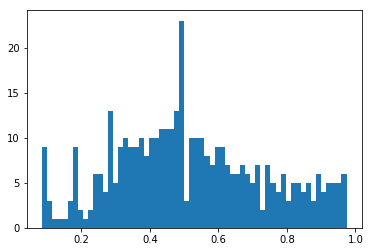

In [127]:
print('For the cases where both SL and TP are above 0:')

print('Minimum value is:', min(p_values))
print('Maximum value is:', max(p_values))

_ = plt.hist(p_values, bins=60)

In other cases:
When SL is 0, the p is close to 0. So the minimum value is: 4.034216117539205e-08
When TP is 0, the p is close to 1. So the maximum value is: 1.000000000005052


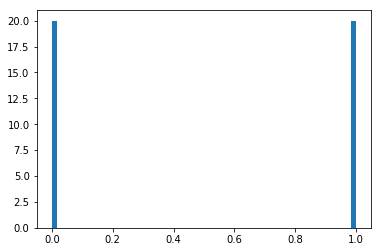

In [131]:
print('In other cases:')
p_boundary = [x for x in p_boundary if str(x) != 'nan']

print('When SL is 0, the p is close to 0. So the minimum value is:', min(p_boundary))
print('When TP is 0, the p is close to 1. So the maximum value is:', max(p_boundary))

_ = plt.hist(p_boundary, bins=60)

So, the range of p implied by Figure 13.1 goes from 0.085 to 0.974

### (c) What is the range of p implied by Figure 13.5, for a weekly betting frequency?

In [133]:
rPT=rSLm=np.linspace(0,10,21)
coeffs={'forecast':0,'hl':100,'sigma':1}
output=batch(coeffs,nIter=1e5,maxHP=100,rPT=rPT,rSLm=rSLm)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440


In [134]:
n = 52 # assume weekly trading

p_values = []
p_boundary = []
for el in output:
    tp, sl, _, _, SR = el
    sl = -sl
    
    a = (n + SR**2) * (tp - sl)**2
    b = (2 * n * sl - SR**2 * (tp - sl)) * (tp - sl)
    c = n * sl**2
    
    p = (-b + (b**2 - 4 * a * c)**(1/2)) / (2 * a)
    if tp == 0 or sl == 0:
        p_boundary.append(p)    
        continue
    p_values.append(p)

D:\programs\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


For the cases where both SL and TP are above 0:
Minimum value is: 0.050196934994055684
Maximum value is: 0.954862174441729


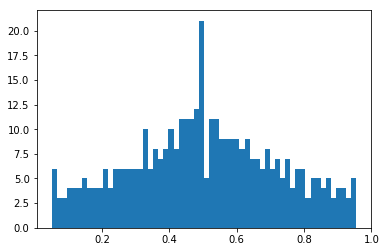

In [135]:
print('For the cases where both SL and TP are above 0:')

print('Minimum value is:', min(p_values))
print('Maximum value is:', max(p_values))

_ = plt.hist(p_values, bins=60)

In other cases:
When SL is 0, the p is close to 0. So the minimum value is: 6.200649721765223e-10
When TP is 0, the p is close to 1. So the maximum value is: 1.00000000067029


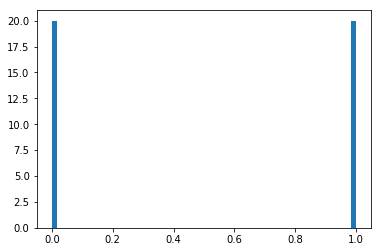

In [136]:
print('In other cases:')
p_boundary = [x for x in p_boundary if str(x) != 'nan']

print('When SL is 0, the p is close to 0. So the minimum value is:', min(p_boundary))
print('When TP is 0, the p is close to 1. So the maximum value is:', max(p_boundary))

_ = plt.hist(p_boundary, bins=60)

With an increased half-life from 5 to 100 we can see that the p distribution is much more narrow.